In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 【問題1】データの可視化

In [2]:
import numpy as np

csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する

np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)


In [3]:
print(fuji[0: 14])
# 左から順番に「その地点の番号」「緯度」「経度」「標高」「地点0からの距離」

fuji.shape

[[   0.         35.134141  139.132082    0.          0.      ]
 [   1.         35.135826  139.129202    0.        322.      ]
 [   2.         35.13751   139.126322    0.        644.      ]
 [   3.         35.139194  139.123441    0.        966.      ]
 [   4.         35.140878  139.12056     0.       1288.      ]
 [   5.         35.142562  139.117679    0.       1611.      ]
 [   6.         35.144246  139.114799    6.62     1933.      ]
 [   7.         35.145929  139.111917    7.21     2255.      ]
 [   8.         35.147613  139.109036   12.2      2577.      ]
 [   9.         35.149297  139.106155   54.41     2899.      ]
 [  10.         35.15098   139.103273  171.56     3222.      ]
 [  11.         35.152664  139.100392  177.84     3544.      ]
 [  12.         35.154347  139.09751   228.21     3866.      ]
 [  13.         35.15603   139.094628  275.38     4188.      ]]


(300, 5)

In [4]:
x = fuji[:, 0]
y = fuji[:, 3]

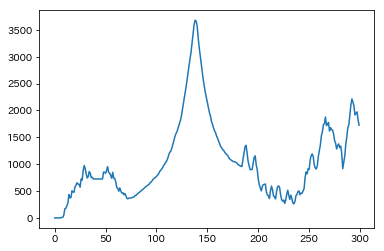

In [5]:
plt.plot(x, y)
plt.show();

In [6]:
def grad(i):
    """
    parameter
    -----------------
    i : int
        ある地点の番号
    ---------------------
    """
    x_diff = fuji[i, 0] - fuji[i-1, 0]
    y_diff = fuji[i, 3] -fuji[i-1,3]
    grad = y_diff / x_diff 
    return grad
   

In [7]:
grad(136)

168.35000000000036

# 【問題3】移動先の地点を計算する関数を作成

In [24]:
def moved_position(i): 
    alpha = 0.005
    #勾配の計算関数
    def grad(i):
        """
        parameter
        -----------------
        i : int
            ある地点の番号
        ---------------------
        """
        x_diff = fuji[i, 0] - fuji[i-1, 0]
        y_diff = fuji[i, 3] -fuji[i-1, 3]
        grad = y_diff / x_diff 
        return grad
    
    moved_position =  i - alpha*grad(i)
    if moved_position <= 0:
        moved_position = 0
    elif moved_position >= 300:
        moved_position = 299
    return np.int64(moved_position)

In [29]:
position = moved_position(136)
position

135

# 【問題4】山を下る関数を作成

In [26]:
def descend_mont(i):
    p_list = []
    list_no = 1
    p_list.append(i)
    p_list.append(moved_position(i))
    
    while  True :
        p_list.append(moved_position(p_list[list_no]))
        list_no += 1
        
        # ifで標高の差を見て増加した場合は処理終了
        if  fuji[p_list[list_no], 3] >= fuji[p_list[list_no - 1], 3]:
            p_list.pop()
            p_list = list(set(p_list))
            break
    return p_list

In [27]:
descend_mont(136)

[128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127]

# 【問題5】下山過程の可視化

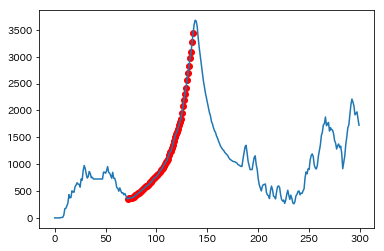

In [28]:
x_all = fuji[:, 0]
y_all = fuji[:, 3]
x = descend_mont(136)
y = fuji[x, 3]

plt.plot(x_all, y_all)
plt.scatter(x, y, color='red')
plt.show()


# 【問題6】初期値の変更

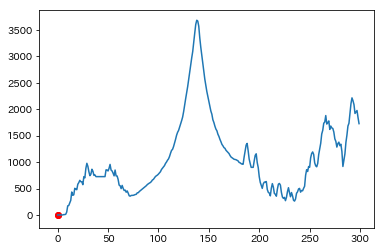

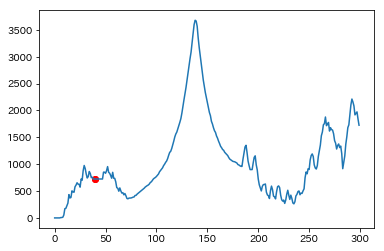

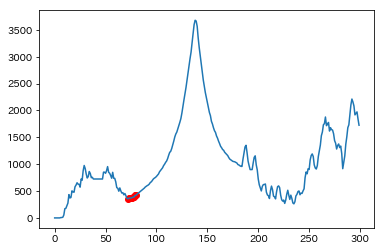

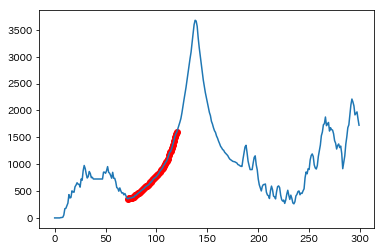

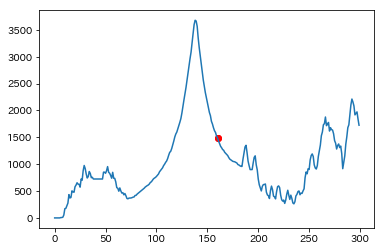

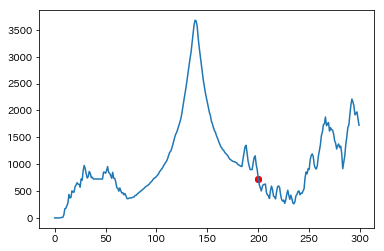

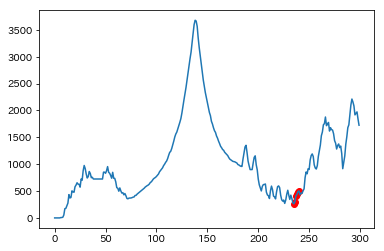

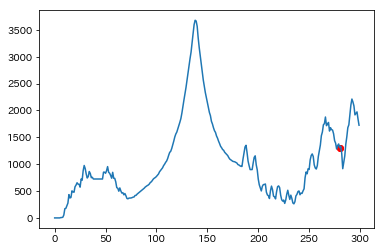

In [23]:
for i in range(299):
    x = descend_mont(i)
    if i % 40 == 0:
        x_all = fuji[:, 0]
        y_all = fuji[:, 3]
        y = fuji[x, 3]
        plt.plot(x_all, y_all)
        plt.scatter(x, y, color='red')
        plt.show();
        